In [21]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import pyregion
from astropy.wcs import WCS

In [14]:
data_id='sigd'
if data_id=='sigd':
    ext=4
elif data_id=='qpah':
    ext=2
img_lmc = fits.open("../lmc_dl07_fixedbeta_06sep18_dust_param_realizations_2.fits", ignore_blank=True)[ext]
img_smc = fits.open("../smc_dl07_fixedbeta_06sep18_dust_param_realizations_2.fits", ignore_blank=True)[ext]

regfile_lmc = "../scylla_LMC_all_regions.reg"
regfile_smc = "../scylla_SMC_all_regions.reg"

In [50]:
hdr_lmc = img_lmc.header
hdr_smc = img_smc.header 
data_sd_lmc = img_lmc.data
data_sd_smc = img_smc.data

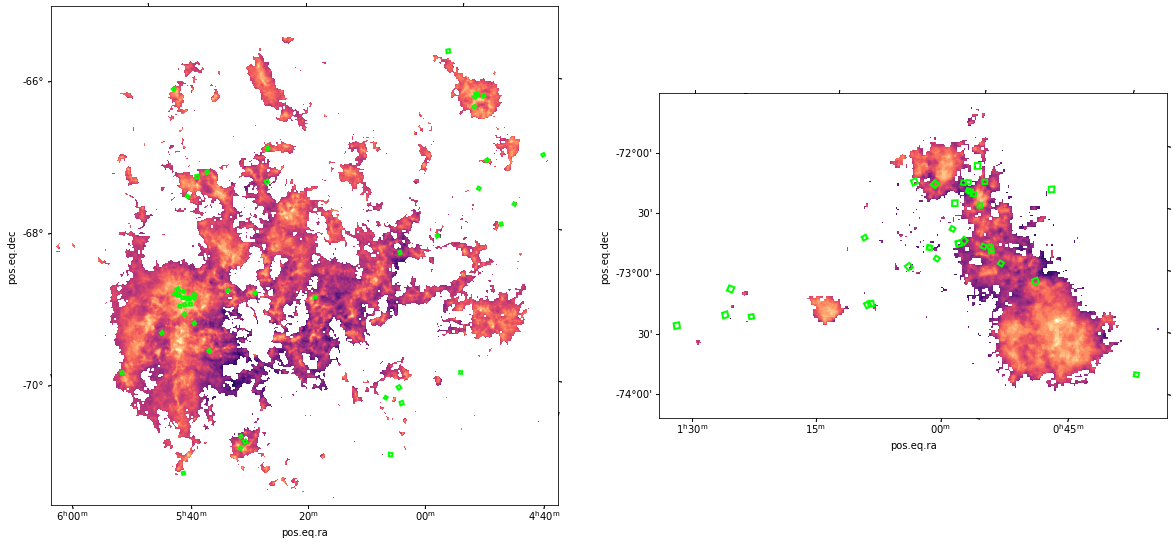

In [58]:
plt.figure(figsize=(20, 12))

# LMC
extent_lmc = [680, 100, 80, 650]
wcs_lmc = WCS(hdr_lmc, naxis=0, fix=False)
ax1 = plt.subplot(121, projection=wcs_lmc)
ax1.imshow(data_sd_lmc, cmap='magma')
ax1.set_xlim(extent_lmc[1], extent_lmc[0])
ax1.set_ylim(extent_lmc[2], extent_lmc[3])
plot_region(regfile_lmc, hdr_lmc, ax1)

# SMC
extent_smc = [760, 400, 200, 430]
wcs_smc = WCS(hdr_smc, naxis=0, fix=False)
ax2 = plt.subplot(122, projection=wcs_smc)
ax2.imshow(data_sd_smc, cmap='magma')
ax2.set_xlim(extent_smc[1], extent_smc[0])
ax2.set_ylim(extent_smc[2], extent_smc[3])
plot_region(regfile_smc, hdr_smc, ax2)

plt.savefig("../scylla_lmc_smc_" + data_id + "_regions.png", bbox_inches='tight')

In [12]:
def plot_region(regfile, hdr, ax):
    """
    Plot region from a DS9 region file.

    Parameters
    ----------
    regfile:    string
                Path to and region file
    hdu:        Header Data Unit
                The HDU of the map/data on top of which the region is plotted.
    ax:         matplotlib axis object
                The axis of the plot

    Returns
    -------
    """

    r = pyregion.open(regfile).as_imagecoord(header=hdr)
    r1 = pyregion.ShapeList([rr for rr in r if rr.attr[1].get("tag") == "Group 1"])
    patch_list1, artist_list1 = r1.get_mpl_patches_texts(fixed_color)
    r2 = pyregion.ShapeList([rr for rr in r if rr.attr[1].get("tag") != "Group 1"])
    patch_list2, artist_list2 = r2.get_mpl_patches_texts()
    for p in patch_list1 + patch_list2:
        ax.add_patch(p)


In [17]:
def fixed_color(shape, saved_attrs):
    attr_list, attr_dict = saved_attrs
    attr_dict["color"] = "red"
    kwargs = properties_func_default(shape, (attr_list, attr_dict))

    return kwargs